## Многомерный статистический анализ
### ЛР № 3. Анализ эквивалентности двух многомерных гауссовых СВ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import ticker, cm
import scipy.stats as sps

#### 1. Формирование программ для статистического исследования метода анализа

***1. 1. Сформировать функцию пользователя, генерирующую две выборки двух двумерных нормальных СВ с заданными параметрами***

In [5]:
# Моделирование СВ:
def mod_2mult_norm(mx1, mx2, rx, sx1, sx2, nx,
                   my1, my2, ry, sy1, sy2, ny, rnd):
    """ Генерирование выборок X, Y двумерных нормальных СВ
        с заданными параметрами
        Параметры: 
            mx1 - МО первой компоненты СВ X,
            mx2 - МО второй компоненты СВ X,
            rx - коэфф. корр. СВ X,
            sx1 - СКО первой компоненты СВ X,
            sx2 - СКО второй компоненты СВ X,
            nx - длина выборки СВ X,
            my1 - МО первой компоненты СВ Y,
            my2 - МО второй компоненты СВ Y,
            ry - коэфф. корр. СВ Y,
            sy1 - СКО первой компоненты СВ Y,
            sy2 - СКО второй компоненты СВ X,
            ny - длина выборки СВ Y,
            rnd - параметр инициализации СВ.
        Возвращает: 
            X, Y - массивы значений СВ
    """
    
    Kx = [[sx1**2, rx * sx1 * sx2],
          [rx * sx1 * sx2, sx2**2]] # ковар. матр. СВ X
    
    X = multivariate_normal.rvs(
        mean=[mx1, mx2], # выборка СВ X
        cov=Kx,
        size=nx,
        random_state=rnd
    )
    
    Ky = [[sy1**2, ry * sy1 * sy2], 
          [ry * sy1 * sy2, sy2**2]] # ковар. матр. СВ Y
    
    Y = multivariate_normal.rvs(
        mean=[my1, my2], # выборка СВ Y
        cov=Ky,
        size=ny,
        random_state=rnd+1
    )
    
    return X, Y

***1.2. Сформировать функцию пользователя, вычисляющую статистику V для проверки равенства ков. матриц СВ X и Y***

In [7]:
def Vs(X, Y):
    """ Вычисление статистики V
        Параметры: X, Y - выборки СВ X и Y
        Возвращает: V - статистика V
    """

    n_x = len(X)
    n_y = len(Y)

    k = X.shape[1]
    
    m_x = 1 / n_x * np.sum(X, axis=0)
    m_y = 1 / n_y * np.sum(Y, axis=0)

    Z_x = X - m_x
    Z_y = Y - m_y

    K_x = 1 / (n_x - 1) * Z_x.T @ Z_x
    K_y = 1 / (n_y - 1) * Z_y.T @ Z_y
    
    K_xy = 1 / (n_x + n_y - 2) * ((n_x - 1) * K_x + (n_y - 1) * K_y)
    
    a = (n_x + n_y - 2) * np.log(np.linalg.det(K_xy)) - ((n_x - 1) * np.log(np.linalg.det(K_x))) - ((n_y - 1) * np.log(np.linalg.det(K_y)))
    b = 1 - (1 / (n_x - 1) + 1 / (n_y - 1) - 1 / (n_x + n_y - 2)) * (2*k**2 + 3*k - 1) / (6 * (k+1))

    V = a * b
    
    return V
    

***1.3. Сформировать функцию пользователя, вычисляющую статистику W для проверки равенства МО СВ X и Y***

In [9]:
def Ws(X, Y):
    """ Вычисление статистики W
        Параметры: X, Y - выборки СВ X и Y
        Возвращает: W - статистика W
    """

    n_x = len(X)
    n_y = len(Y)

    k = X.shape[1]
    
    m_x = 1 / n_x * np.sum(X, axis=0)
    m_y = 1 / n_y * np.sum(Y, axis=0)

    Z_x = X - m_x
    Z_y = Y - m_y

    K_x = 1 / (n_x - 1) * Z_x.T @ Z_x
    K_y = 1 / (n_y - 1) * Z_y.T @ Z_y
    
    K_xy = 1 / (n_x + n_y - 2) * ((n_x - 1) * K_x + (n_y - 1) * K_y)

    T_2 = (n_x * n_y) / (n_x + n_y) * (m_x - m_y) @ np.linalg.inv(K_xy) @ (m_x - m_y)

    W = (n_x + n_y - k - 1) / (k * (n_x + n_y - 2)) * T_2
    
    return W

#### 2. Статистическое исследование методов анализа

***2.1. Для анализа качества статистики V как индикатора эквивалентности ковариационных матриц СВ X и Y сформировать два набора
выборок этих СВ с заданными параметрами. Первый набор выборок должен иметь выборки значений эквивалентных СВ (Y = X). Второй
набор выборок должен содержать выборки различных СВ. Количество выборок в каждом наборе N =10000. Для каждого из двух описанных
наборов сформировать массивы соответствующих значений статистики V.***

In [12]:
# Параметры СВ:
nx = 100 # длина выборки СВ X
[mx1, mx2] = [1, 1] # МО СВ X
rx = 0.6 # коэфф. корр. СВ X
sx1 = 1 # СКО первой компоненты СВ X
sx2 = 1 # СКО второй компоненты СВ X
ny = 150 # длина выборки СВ Y
[my1, my2] = [1.3, 1] # МО СВ Y
ry = 0.8 # коэфф. корр. СВ Y
sy1 = 1 # СКО первой компоненты СВ Y
sy2 = 1 # СКО второй компоненты СВ Y

In [13]:
# Формирование наборов выборок СВ и массивов значений статистики V:
N = 10000 # количество выборок
V0 = np.zeros(N) # инициализация массива знач. статистики V
V1 = np.zeros(N) # инициализация массива знач. статистики V
for i in range(N):
    # Выборка значений эквивалентных СВ:
    X, Y = mod_2mult_norm(mx1, mx2, rx, sx1, sx2, nx,
                          mx1, mx2, rx, sx1, sx2, ny, i)
    V0[i] = Vs(X, Y) # статистика эквиввалентных СВ
    # Выборка значений различных СВ:
    X, Y = mod_2mult_norm(mx1, mx2, rx, sx1, sx2, nx,
                          my1, my2, ry, sy1, sy2, ny, i)
    V1[i] = Vs(X, Y) # статистика различных СВ

***2.2. Построить нормированную гистограмму значений статистики V для эквивалентных СВ и ее плотность распределения.***

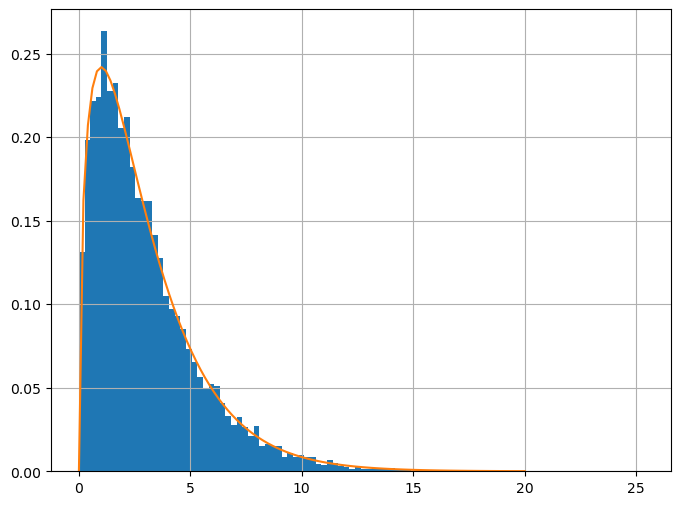

In [15]:
k = 2 # размерность СВ
x = np.linspace(0, 20, 100) # массив аргументов плотности
y = sps.chi2.pdf(x, k * (k + 1) / 2) # массив значений плотности
# Визуализация гистограммы и плотности:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(V0, bins=100, density=1)
ax.plot(x, y)
ax.grid()

***2.3. Построить ROC-кривую для исследуемого алгоритма определения равенства ковариационных матриц СВ. Вычислить AUC***

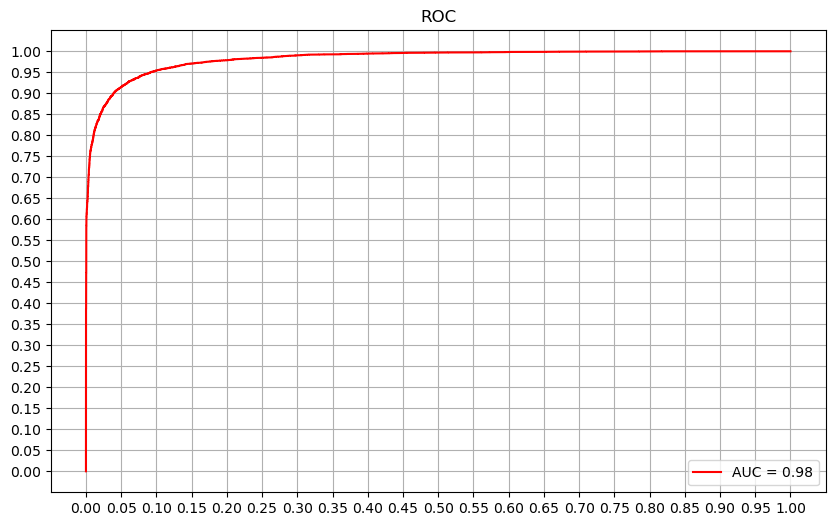

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
y = np.r_[np.zeros(N), np.ones(N)] # массив индексов истинных гипотез
T = np.r_[V0, V1] # объединенный массив значений статистики V
fpr, tpr, _ = roc_curve(y, T) # ROC-кривая
auc = roc_auc_score(y, T) # значение AU

# Визуализация ROC-кривой:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, 'r')
ax.grid()
ax.set_title("ROC")
ax.set_xticks(np.arange(0, 1.05, 0.05))
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.legend([f"AUC = {round(auc, 2)}"], loc="lower right");

***2.4. Построить диаграммы рассеяния выборок значений различных СВ***

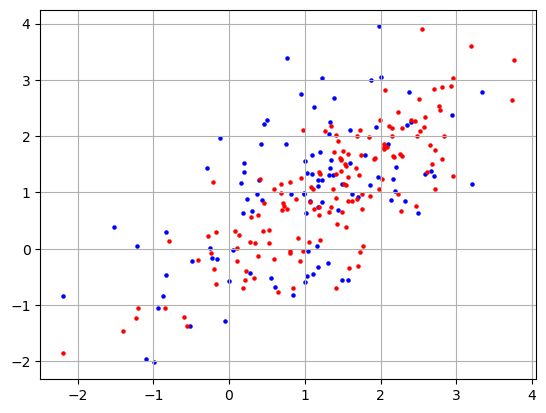

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=5, c='b')
plt.scatter(Y[:, 0], Y[:, 1], s=5, c='r')
plt.grid()

***2.5. Для анализа качества статистики W как индикатора эквивалентности МО СВ X и Y сформировать два набора выборок этих СВ с
заданными параметрами. Первый набор выборок должен иметь выборки значений эквивалентных СВ (Y = X). Второй набор выборок должен
содержать выборки различных СВ. Количество выборок в каждом наборе N = 10000. Для каждого из двух описанных наборов сформировать
массивы соответствующих значений статистики W.***

In [21]:
# Формирование наборов выборок СВ и массивов значений статистики W:
W0 = np.zeros(N) # инициализация массива знач. статистики W
W1 = np.zeros(N) # инициализация массива знач. статистики W

# Формирование наборов выборок СВ и массивов значений статистики V:
N = 10000 # количество выборок
V0 = np.zeros(N) # инициализация массива знач. статистики V
V1 = np.zeros(N) # инициализация массива знач. статистики V
for i in range(N):
    # Выборка значений эквивалентных СВ:
    X, Y = mod_2mult_norm(mx1, mx2, rx, sx1, sx2, nx,
                          mx1, mx2, rx, sx1, sx2, ny, i)
    V0[i] = Ws(X, Y) # статистика эквиввалентных СВ
    # Выборка значений различных СВ:
    X, Y = mod_2mult_norm(mx1, mx2, rx, sx1, sx2, nx,
                          my1, my2, ry, sy1, sy2, ny, i)
    V1[i] = Ws(X, Y) # статистика различных СВ

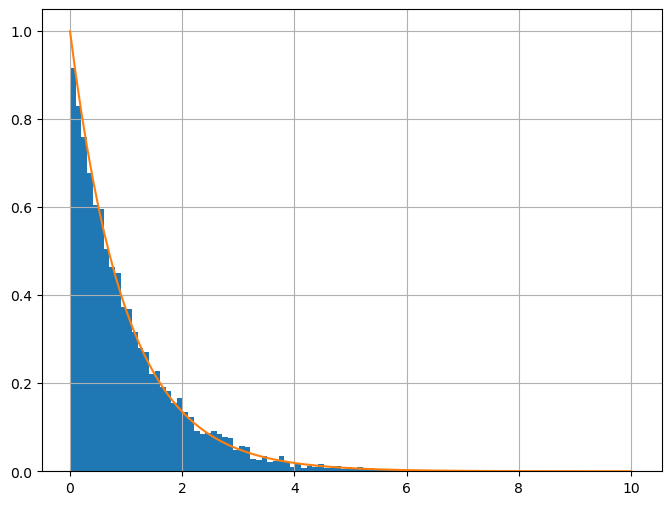

In [22]:
x = np.linspace(0, 10, 100) # массив аргументов плотности
y = sps.f.pdf(x, k, nx + ny - k - 1) # массив значений плотности
# Визуализация гистограммы и плотности:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(V0, bins=100, density=1)
ax.plot(x, y)
ax.grid()

***2.7. Построить ROC-кривую для исследуемого алгоритма определения равенства МО СВ. Вычислить AUC.***

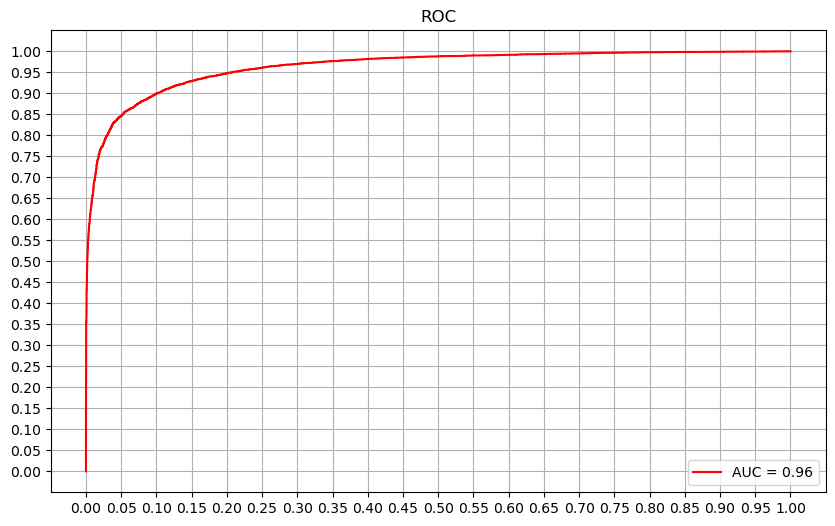

In [24]:
y = np.r_[np.zeros(N), np.ones(N)] # массив индексов истинных гипотез
T = np.r_[V0, V1] # объединенный массив значений статистики V
fpr, tpr, _ = roc_curve(y, T) # ROC-кривая
auc = roc_auc_score(y, T) # значение AU

# Визуализация ROC-кривой:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, 'r')
ax.grid()
ax.set_title("ROC")
ax.set_xticks(np.arange(0, 1.05, 0.05))
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.legend([f"AUC = {round(auc, 2)}"], loc="lower right");

***2.8. Построить зависимость значения AUC для статистики V от коэффициента корреляции СВ Y при его изменении от 0.2 до 0.9.
Компоненты СВ X должны быть некоррелированы.***

In [26]:
# Формирование наборов выборок СВ и массивов значений статистики V:
auc_arr = []
corr_range = np.arange(0.2, 1, 0.1)
for r in corr_range:
    V0 = np.zeros(N) # инициализация массива знач. статистики V
    V1 = np.zeros(N) # инициализация массива знач. статистики V
    for i in range(N):
        # Выборка значений эквивалентных СВ:
        X, Y = mod_2mult_norm(mx1, mx2, 0, sx1, sx2, nx,
                              mx1, mx2, 0, sx1, sx2, ny, i)
        V0[i] = Vs(X, Y) # статистика эквиввалентных СВ
        # Выборка значений различных СВ:
        X, Y = mod_2mult_norm(mx1, mx2, 0, sx1, sx2, nx,
                              my1, my2, r, sy1, sy2, ny, i)
        V1[i] = Vs(X, Y) # статистика различных СВ
    y = np.r_[np.zeros(N), np.ones(N)] # массив индексов истинных гипотез
    T = np.r_[V0, V1] # объединенный массив значений статистики V
    auc_arr.append(roc_auc_score(y, T)) # значение AUC


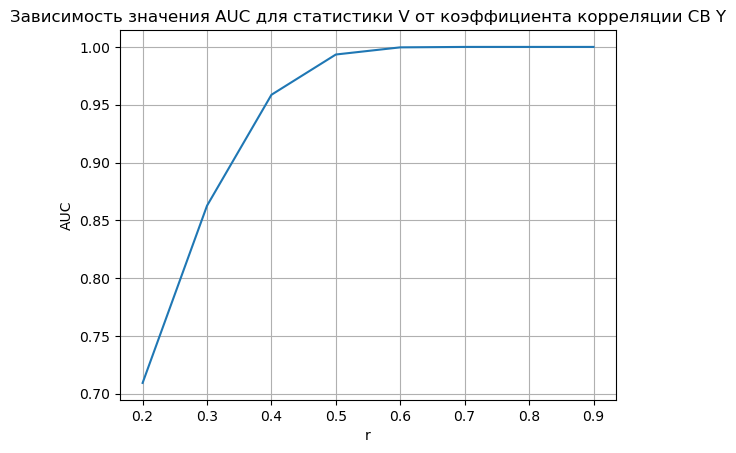

In [27]:
plt.plot(corr_range, auc_arr)
plt.grid()
plt.xlabel('r')
plt.ylabel('AUC')
plt.title('Зависимость значения AUC для статистики V от коэффициента корреляции СВ Y')
plt.show()

***3. Проверить влияние способа организации производства на экономические показатели группы предприятий на основе следующих
выборочных данных при уровне значимости 0.05. Построить диаграмму рассеяния.***

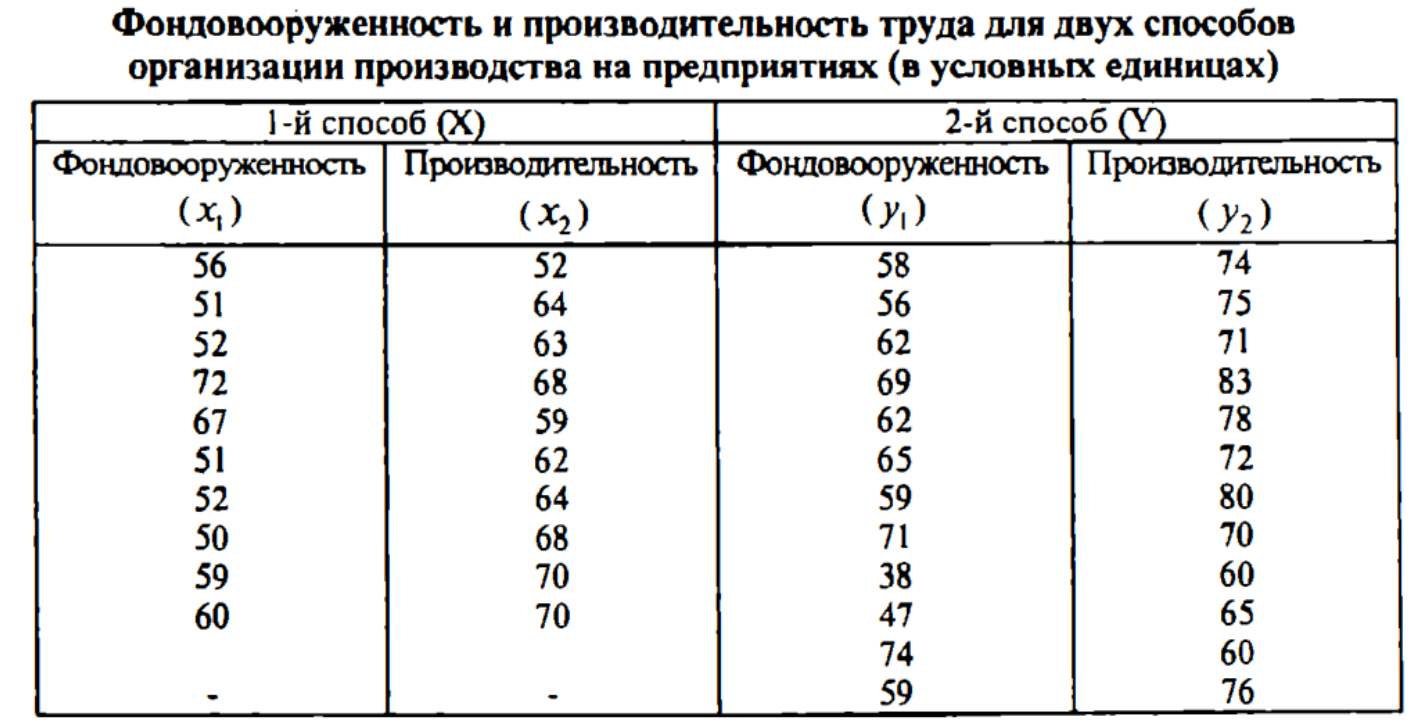

In [30]:
X = np.array([[56, 51, 52, 72, 67, 51, 52, 50, 59, 60],
              [52, 64, 63, 68, 59, 62, 64, 68, 70, 70]])

Y = np.array([[58, 56, 62, 69, 62, 65, 59, 71, 38, 47, 74, 59], 
              [74, 75, 71, 83, 78, 72, 80, 70, 60, 65, 60, 76]])

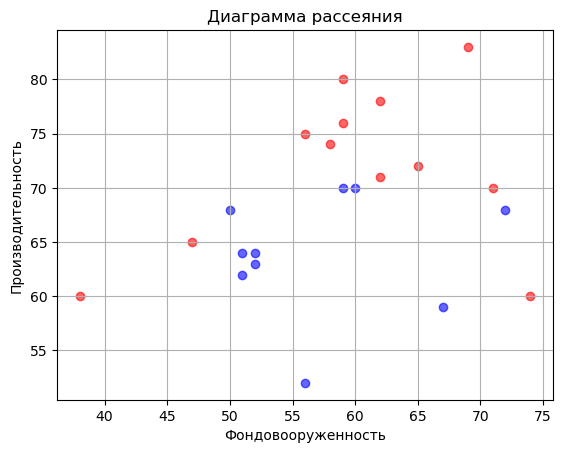

In [31]:
# Построение диаграммы рассеяния:

plt.scatter(*X, alpha=0.6, color='blue')
plt.scatter(*Y, alpha=0.6, color='red')
plt.xlabel('Фондовооруженность')
plt.ylabel('Производительность')
plt.title('Диаграмма рассеяния')
plt.grid(True)

In [54]:
# Принятие решения о равенстве ковар. матриц СВ:
import scipy.stats as sps
alpha = 0.05
k = 2
u = sps.chi2.ppf(1-alpha, k*(k+1)/2)
V = Vs(X.T, Y.T)
print('Принимается ли нулевая гипотеза:', V <= u)

Принимается ли нулевая гипотеза: True


In [56]:
# Принятие решения о равенстве МО СВ:
nx = len(X.T)
ny = len(Y.T)
u = sps.f.ppf(1-alpha, k, nx + ny - k - 1)
W = Ws(X.T, Y.T)
print('Принимается ли нулевая гипотеза:', W <= u)

Принимается ли нулевая гипотеза: False
